In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



In [72]:
np.random.seed(42) 
data = pd.read_csv("p4dataset2023.txt", sep=" ", header=None)
labels = data.iloc[:,2]

In [73]:
def find_most_common_char(column):
    return column.value_counts().idxmax()

mean_population = data.iloc[:, 3:].apply(find_most_common_char, axis=0)
X = data.iloc[:,3:].eq(mean_population[3:]).astype(int)
X = X - X.mean(axis=0)

First two principal components

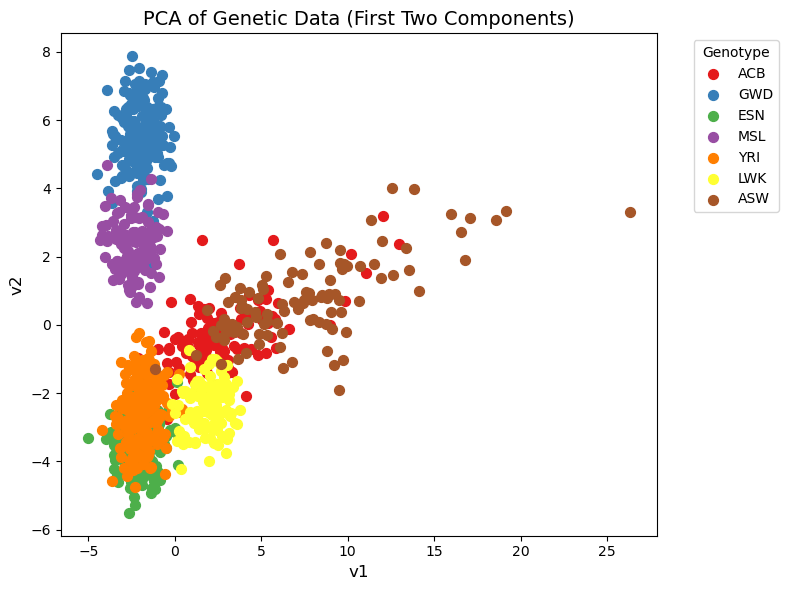

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

num_components = 2
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

unique_labels = labels.unique()  
palette = sns.color_palette("Set1", n_colors=len(unique_labels))
label_color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    label_indices = labels == label
    plt.scatter(X_pca[label_indices, 0], X_pca[label_indices, 1], 
                color=label_color_map[label], label=label, s=50)

plt.title('PCA of Genetic Data (First Two Components)', fontsize=14)
plt.xlabel('v1', fontsize=12)
plt.ylabel('v2', fontsize=12)
plt.legend(title='Genotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




YRI and ESN seem to be indestingishible. Both come from Nigeria which makes sense would be hard to separate. GWD (Gambia) is well separated together with MSL (Sierra Leone), which makes sense as they are further to the west geograpically. Both American and Carribiean genotypes are harder to cluser, which makes sence as a bigger mixture apperd in slave trade / migration. Probably the first two principal components capture geagraphy pretty well, and the history aspect of migration and slave trade to america and the caribbeans make such clusers weaker. 

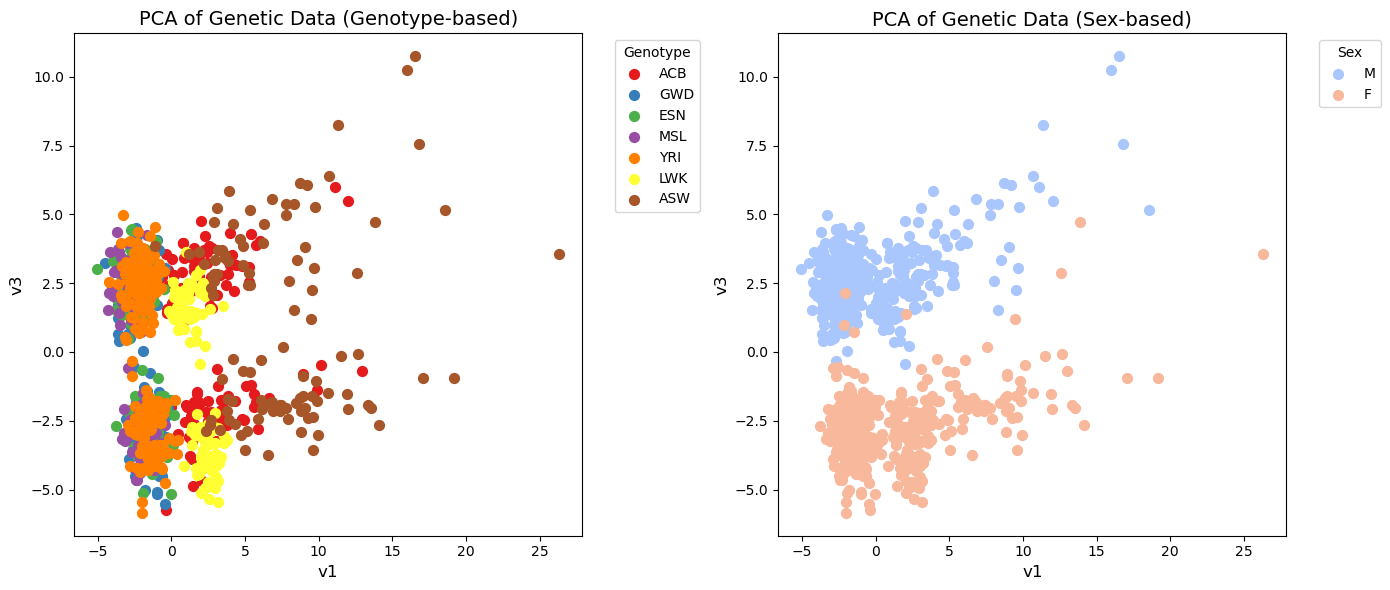

In [ ]:
labels_sex = data.iloc[:,1]
num_components = 3
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

unique_labels = labels.unique()  
palette = sns.color_palette("Set1", n_colors=len(unique_labels)) 

label_color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

sex_palette = sns.color_palette("coolwarm", n_colors=2) 
sex_color_map = {'M': sex_palette[0], 'F': sex_palette[1]} 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, label in enumerate(unique_labels):
    label_indices = labels == label
    axes[0].scatter(X_pca[label_indices, 0], X_pca[label_indices, 2], 
                    color=label_color_map[label], label=label, s=50)

axes[0].set_title('PCA of Genetic Data (Genotype-based)', fontsize=14)
axes[0].set_xlabel('v1', fontsize=12)
axes[0].set_ylabel('v3', fontsize=12)
axes[0].legend(title='Genotype', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, sex in enumerate(['M', 'F']):
    sex_indices = labels_sex == sex
    axes[1].scatter(X_pca[sex_indices, 0], X_pca[sex_indices, 2], 
                    color=sex_color_map[sex], label=sex, s=50)

axes[1].set_title('PCA of Genetic Data (Sex-based)', fontsize=14)
axes[1].set_xlabel('v1', fontsize=12)
axes[1].set_ylabel('v3', fontsize=12)
axes[1].legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Clearly, the first and third principal component capture the diffrence in the genome from which sex the individual belongs to. 

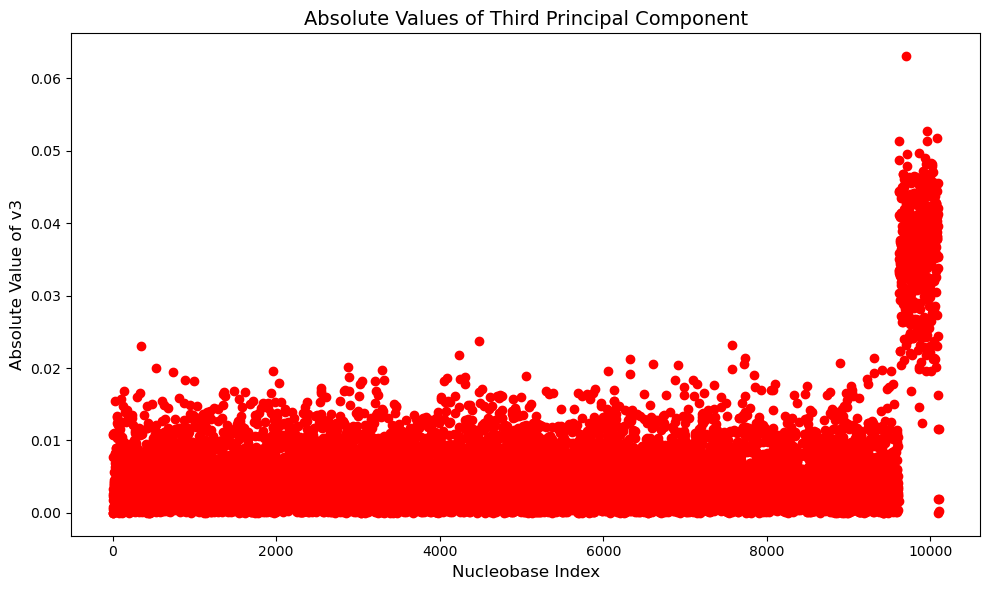

In [78]:
num_components = 3
pca = PCA(n_components=num_components)
pca.fit_transform(X)  
PC3 = pca.components_[2]  
PC3_abs = abs(PC3) 

plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(PC3_abs) + 1), PC3_abs, color='r', marker='o')

plt.title('Absolute Values of Third Principal Component', fontsize=14)
plt.xlabel('Nucleobase Index', fontsize=12)
plt.ylabel('Absolute Value of v3', fontsize=12)

plt.tight_layout()
plt.show()


As the third PC detected sex of the individual, the nucleobases around 10000 seem to be of importance for which gender it is. 